# SUPERVISED REGRESSION ALGORITHMS

**CONTENTS**

- [Simple linear regression](#linear)
- [Regularization](#regularization)
    + [Lasso Regression (L1 regularization)](#lasso)
    + [Ridge Regression (L2 regularization)](#ridge)
    + [Elastic Net (L1 & L2 regularization)](#elastic_net)


<a id='linear'></a>
## 1. LINEAR REGRESSION

- LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. This is the Ordinary Least Squares method (OLS).
- Attempt to draw a straightline that will best minimize the residual sum of squares between the observed samples in the dataset => Use this linear approximation to predict the responses.
- The object of linear regression is to **minimize the "Cost function" or the "Squared error function" or the "Mean squared error" MSE**. "Cost function": 1/2 of the mean of the squares of the different between the predicted and actual values.
- The predicted values is yi_pred = xi * regr.coef_ + regr.intercept_
- Perform gradient descent to minimize the cost function. In each step of the gradient descent, coef_ and intercept_ come closed to the optimal values to achieve the lowest cost function.

## 1.1. Linear regression with single variable


#### Case Study:
- Predict profits for a food truck restaurant franchise based on the population of the cities.
- Input file: "restaurant_profits.txt" 
- Data format: multiple line, each line contains 2 float numbers separated by ",":
    + Example: `"6.110 for 1,17.592"`
    + First columns: the population of the city
    + Second columns: the profit of a food truck in that city
    + Negative profit: a loss in profit.

**Step 1: Load the data:**

In [43]:
### import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
### Import sklearn package
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [44]:
### Load the data
with open('data/restaurant_profits.txt','r') as f:
    X, y, i = [], [], 0
    while f.readline():
        i += 1
        try:
            xi, yi = f.readline().split("\n")[0].split(",")
            X.append(float(xi))
            y.append(float(yi))
        except:
            print("Error, end of line", i)
print(len(X), len(y))

Error, end of line 49
48 48


In [45]:
X = np.array(X)
y = np.array(y)
print(X.mean(), y.mean())

8.359095833333333 6.252554583333333


**Step 2: Plot the data:**

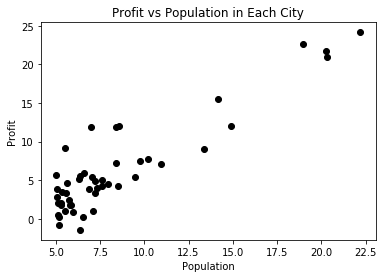

In [46]:
plt.scatter(X, y, color = "black")
plt.title("Profit vs Population in Each City")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

**Step 3: Process the data**
- The data looks good, no need to do any transformation right now.
- Split the data into train/test sets (80:20)

In [47]:
### len(X) = 48, split into 40:8
X_train, X_test = X[:39], X[40:]
y_train, y_test = y[:39], y[40:]
print(len(X_train), len(X_test), len(y_train), len(y_test))

39 8 39 8


In [48]:
### using built-in split train_test set to have random split 
# default train/test size: 75:25
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# print(len(X_train), len(X_test), len(y_train), len(y_test))

In [49]:
### Data has a single feature 
#=> Reshape your data either using array.reshape(-1, 1) or array.reshape(1, -1)
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

**Step 4: Fit the data**

In [50]:
### Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the train set
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Step 5: Plot the train data with the regression line**

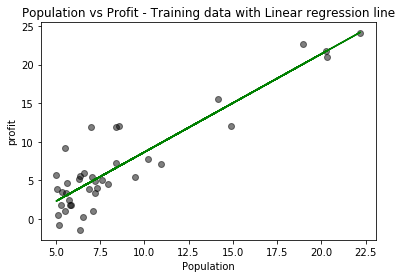

In [51]:
plt.scatter(X_train, y_train, color = "k", alpha = 0.5)
plt.plot(X_train, regr.predict(X_train), color = "g")
plt.title("Population vs Profit - Training data with Linear regression line")
plt.xlabel("Population")
plt.ylabel("profit")
plt.show()

**Step 6: Make prediction on the test data**

In [52]:
### How to manually calculate y_test_pred based on X_test
X_test[0][0]*regr.coef_[0][0] + regr.intercept_

array([2.50379939])

In [53]:
y_test_pred = regr.predict(X_test)

**Step 7: Plot the predict data on test dataset with the regression line**

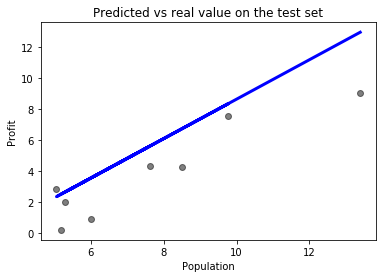

In [54]:
plt.scatter(X_test, y_test, color = 'k', alpha = 0.5)
plt.plot(X_test, y_test_pred, color = "b", linewidth = 3)
plt.title("Predicted vs real value on the test set")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

**Step 8: Evaluate the performance of the linear regression model**

- What is the acceptable mean square error MSE and coefficient of determination R-squared value (R2)?
    + Ideal values (when a model perfectly predicts the data): RMSE = 0, R2 = 1
    + "There is no torelable value of RMSE and R-2 during training and Testing..They completely depend on the problems what your are solving. If the data are too much scattered and nature of the problem is highly non-linear your R2 value would be less. If data are normally distributed and problem is linear you will get good R2 value. However if you are solving some critical problem like medical diagnosis in such a case you should have higher R2 value. It is better to check whether the same kinds of problem have been solved earlier. if so then you can compare those results..."
    + Need to balance between overfit (very low RMSE for training data) and underfit (very high RMSE for test/validation/unseen data).
    + You cannot judge whether one R2 is good or not until you make comparisons with other state-of-the-art methods.

In [55]:
regr.coef_

array([[1.2741095]])

In [56]:
regr.intercept_

array([-4.10679033])

In [57]:
print("Performance of the linear regression model:")
print("Coefficients: ", regr.coef_[0][0])
print("The mean squared error: %.2f"%mean_squared_error(y_test, y_test_pred))
print("Coefficients of determination (Coefficient correlation) (1 is perfect prediction): %.2f"%r2_score(y_test, y_test_pred))

Performance of the linear regression model:
Coefficients:  1.2741094985101735
The mean squared error: 4.59
Coefficients of determination (Coefficient correlation) (1 is perfect prediction): 0.46


In [58]:
### Compare MSE between training and testing
print("The mean square error of training data: %.2f"%mean_squared_error(y_train, regr.predict(X_train)))
print("The mean square error of testing data: %.2f"%mean_squared_error(y_test, y_test_pred))

The mean square error of training data: 7.48
The mean square error of testing data: 4.59


In [59]:
### Extract from regr, stats on test and train datasets
print("r-squared score on test set", regr.score(X_test, y_test))
print("r-squared score on train set", regr.score(X_train, y_train))
# => more bias, since r-squared score on train set > test set but not so accurate

r-squared score on test set 0.45591459610854324
r-squared score on train set 0.8196413736164514


## 1.2. Linear regression with multiple variables

#### Case Study:
- Predict housing prices in a city based on the size of the house (in square feet), and the number of bedrooms
- Input file: "housing_price.txt" 
- Data format: multiple line, each line contains 3 float numbers separated by ",":
    + Example: `"6.110 for 1,17.592"`
    + First columns: the size of the house (in square feet) - type int
    + Second columns: the number of bedrooms - type int
    + Third columns: the price of the house - type int

**Step 1: Load the data**

In [68]:
with open("data/housing_price.txt",'r') as f:
    data = f.read().split("\n")
X, y = [], []
for val in data:
    try:
        x1, x2, yi = val.split(",")
        X.append([float(x1), float(x2)])
        y.append(float(yi))
    except:
        print("Parsing error")
print(len(X), len(y))

Parsing error
47 47


In [69]:
X = np.array(X)
y = np.array(y)

**Step 2: Plot the data**
- 2 features could be plot using 3D plot

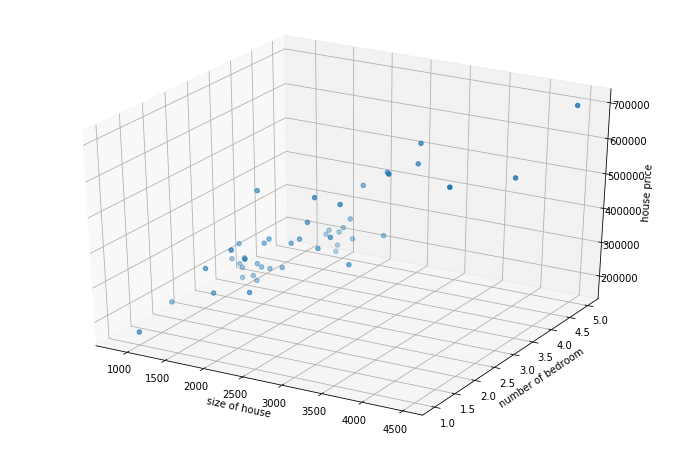

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection = '3d')
p = ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel('size of house')
ax.set_ylabel('number of bedroom')
ax.set_zlabel('house price')

plt.show()

**Step 3: Process the data**

In [71]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

37 10 37 10


**Step 4: Fit the data**

In [72]:
### Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the train set
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
print("Performance of the linear regression model on the train data:")
print("The mean squared error: %.2f"%mean_squared_error(y_train, regr.predict(X_train)))
print("Coefficients of determination (Coefficient correlation) (1 is perfect prediction): %.2f"%r2_score(y_train, regr.predict(X_train)))

Performance of the linear regression model on the train data:
The mean squared error: 3058269204.31
Coefficients of determination (Coefficient correlation) (1 is perfect prediction): 0.77


In [74]:
y_test_pred = regr.predict(X_test)
print("Performance of the linear regression model on the test data:")
print("The mean squared error: %.2f"%mean_squared_error(y_test, y_test_pred))
print("Coefficients of determination (Coefficient correlation) (1 is perfect prediction): %.2f"%r2_score(y_test, y_test_pred))

Performance of the linear regression model on the test data:
The mean squared error: 8610424544.78
Coefficients of determination (Coefficient correlation) (1 is perfect prediction): 0.51


<a id='regularization'></a>
## 2. LINEAR REGRESSION WITH REGULARIZATION

- Drawbacks of basic linear regression:
    + Overfit if the model has many input features
    + Cannot easily express non-linear relationships.
=> Regularization could be used to prevent overfitting by artificially penalizing model coefficients:
    + Discourage large coefficients (by dampening them).
    + Remove features entirely (by setting their coefficients to 0)
- 3 regularized linear regression algorithms:
    + Lasso Regression (L1 regularization)
    + Ridge Regression (L2 regularization)
    + Elastic-Net (L1 & L2 regularization)

<a id='lasso'></a>
### 2.1.  LASSO REGRESSION 

- Least Absolute Shrinkage and Selection Operator
- The loss function is modified to minimize the complexity of the model.
- Works by penalizing the absolute size of coefficients though limiting the sum of the absolute value of the coefficients.
- This is the L1 normalization:
    `loss function = OLS + alpha * sum(abs(coefficient))`
- Could be used as automatic feature selection because it can completely remove some features. The coefficients of less important features are reduced to zero.

- **Parameters need to be tuned**:
    + alpha, default = 1.0. When alpha = 0:  this is the OLS regression.
    + Range to test: [0.01, 0.1, 0.5, 1.0]

In [79]:
### Create linear regression object
regr = linear_model.Lasso(alpha = .1)
# Train the model using the train set
regr.fit(X_train, y_train)
print(regr.coef_)

[   143.21837434 -13512.32422146]


In [102]:
y_train_pred = regr.predict(X_train)
print("Performance of the linear regression model on the train data:")
print("The root mean squared error (RMSE): %.2f"%np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): %.2f"%r2_score(y_train, y_train_pred))

y_test_pred = regr.predict(X_test)
print("Performance of the linear regression model on the test data:")
print("The root mean squared error (RMSE): %.2f"%np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): %.2f"%r2_score(y_test, y_test_pred))

Performance of the linear regression model on the train data:
The root mean squared error (RMSE): 55815.54
Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): 0.76
Performance of the linear regression model on the test data:
The root mean squared error (RMSE): 91803.60
Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): 0.53


<a id='ridge'></a>
### 2.2.  RIDGE REGRESSION

- Feature shrinkage
- The loss function is modified to minimize the complexity of the model.
- Works by penalizing the **square of coefficients**.
- This is the L2 normalization:
    `loss function = OLS + alpha * sum(squared(coefficient))`
- Practically, this leads to smaller coefficients but not forced to 0.

- **Parameters need to be tuned**:
    + alpha, default = 1.0. When alpha = 0:  this is the OLS regression.
    + Low alpha: over-fitting, High alpha: under-fitting since it leads to coefficients closer to 0.

In [97]:
### Create linear regression object
regr = linear_model.Ridge(alpha = 100)
# Train the model using the train set
regr.fit(X_train, y_train)
print(regr.coef_)

[  135.54015369 -1804.56592797]


In [103]:
y_train_pred = regr.predict(X_train)
print("Performance of the linear regression model on the train data:")
print("The root mean squared error (RMSE): %.2f"%np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): %.2f"%r2_score(y_train, y_train_pred))

y_test_pred = regr.predict(X_test)
print("Performance of the linear regression model on the test data:")
print("The root mean squared error (RMSE): %.2f"%np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): %.2f"%r2_score(y_test, y_test_pred))

Performance of the linear regression model on the train data:
The root mean squared error (RMSE): 55815.54
Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): 0.76
Performance of the linear regression model on the test data:
The root mean squared error (RMSE): 91803.60
Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): 0.53


<a id='elastic_net'></a>
### 2.3.  ELASTIC-NET

- Compromise betqeen Lasso and Ridge.
- Penalize both the absolute and squared size of coefficients 
- This is the L1 & L2 normalization.

- **Parameters need to be tuned**:
    + Ratio of the 2 penalty types l1_ratio should be tuned, default = 0.5. l1_ratio = 1 => Lasso regression, l1_ratio = 0 => Ridge regression.
    + alpha, default = 1.0. When alpha = 0:  this is the OLS regression.

In [108]:
### Create linear regression object
regr = linear_model.ElasticNet(alpha = 10, l1_ratio = 0.3)
# Train the model using the train set
regr.fit(X_train, y_train)
print(regr.coef_)

[ 134.85315023 -758.51428749]


In [109]:
y_train_pred = regr.predict(X_train)
print("Performance of the linear regression model on the train data:")
print("The root mean squared error (RMSE): %.2f"%np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): %.2f"%r2_score(y_train, y_train_pred))

y_test_pred = regr.predict(X_test)
print("Performance of the linear regression model on the test data:")
print("The root mean squared error (RMSE): %.2f"%np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): %.2f"%r2_score(y_test, y_test_pred))

Performance of the linear regression model on the train data:
The root mean squared error (RMSE): 55910.95
Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): 0.76
Performance of the linear regression model on the test data:
The root mean squared error (RMSE): 91738.70
Coefficients of determination (Coefficient correlation - R-squared score) (1 is perfect prediction): 0.53
